In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [3]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [4]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [5]:
series = pd.read_csv('city_day.csv')
series_delhi = series.loc[series['City'] == 'Delhi']
ts_delhi = series_delhi[['Date','AQI']]
#converting 'Date' column to type 'datetime' so that indexing can happen later
ts_delhi['Date'] = pd.to_datetime(ts_delhi['Date'])


In [6]:
ts_delhi['Date'].min(), ts_delhi['Date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2020-07-01 00:00:00'))

In [7]:
ts_delhi['AQI'].min(), ts_delhi['AQI'].max()

(29.0, 716.0)

In [8]:
ts_delhi.isnull().sum()
ts_delhi = ts_delhi.dropna()
ts_delhi.isnull().sum()

Date    0
AQI     0
dtype: int64

In [9]:
ts_delhi = ts_delhi.set_index('Date')

In [10]:
ts_month_avg = ts_delhi['AQI'].resample('MS').mean()

In [11]:
ts_delhi.head(3)

,AQI
Date,
2015-01-01,472.0
2015-01-02,454.0
2015-01-03,143.0


In [12]:
ts_month_avg.head(3)

Date
2015-01-01    342.290323
2015-02-01    327.928571
2015-03-01    256.064516
Freq: MS, Name: AQI, dtype: float64

In [13]:
ts_month_avg.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 67 entries, 2015-01-01 to 2020-07-01
Freq: MS
Series name: AQI
Non-Null Count  Dtype  
--------------  -----  
67 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


In [14]:
ts_delhi['AQI'].min(), ts_delhi['AQI'].max()

(29.0, 716.0)

In [15]:
len(ts_month_avg)

67

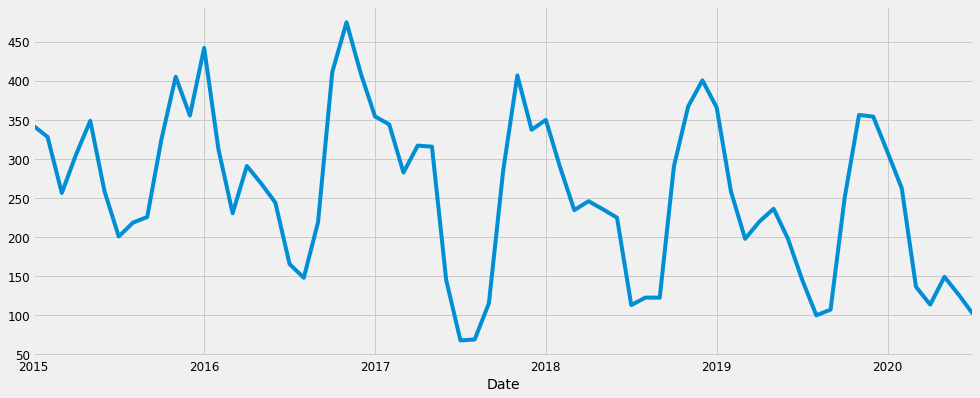

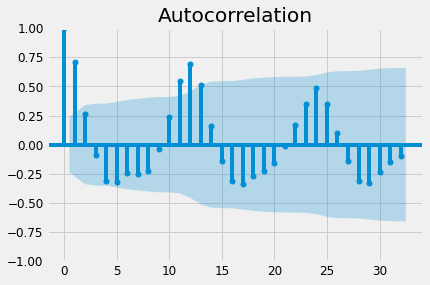

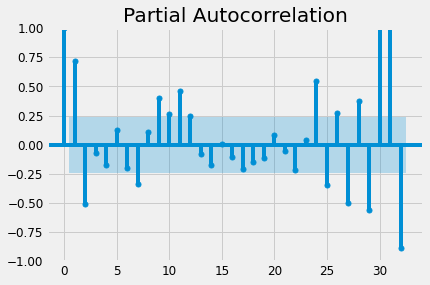

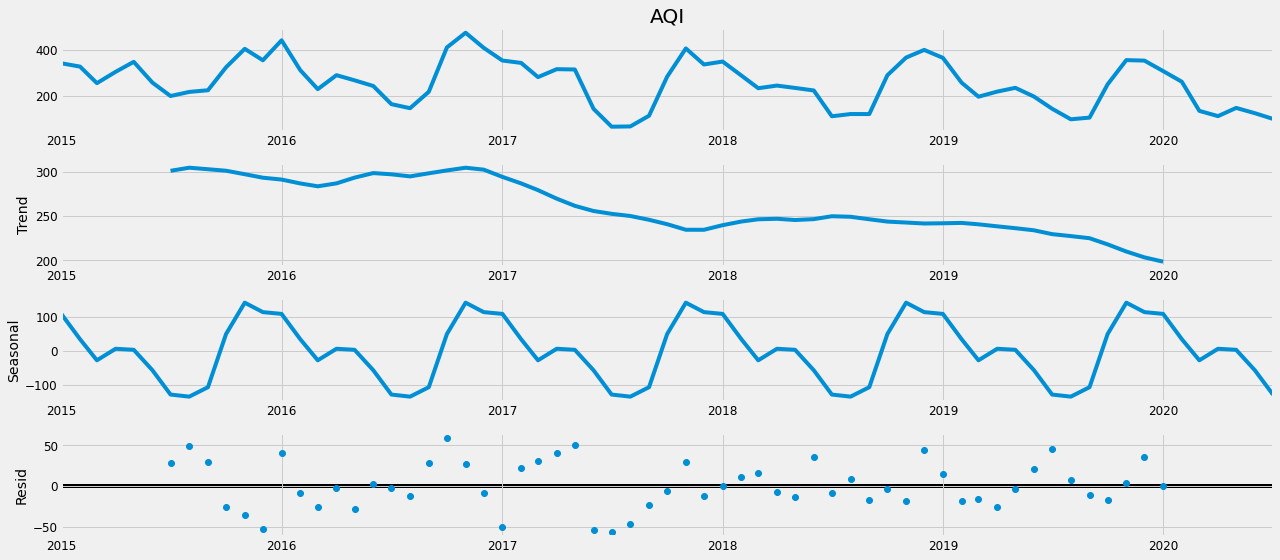

In [16]:
ts_month_avg.plot(figsize=(15, 6))
plt.show()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_month_avg, lags=32)
matplotlib.pyplot.show()
plot_pacf(ts_month_avg, lags=32)
matplotlib.pyplot.show()

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts_month_avg, model='additive')
fig = decomposition.plot()
plt.show()

In [17]:
#apply adf test on the series
print(adf_test(ts_month_avg))
print(kpss_test(ts_month_avg))

Results of Dickey-Fuller Test:
Test Statistic                  0.229024
p-value                         0.973843
#Lags Used                     11.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64
None
Results of KPSS Test:
Test Statistic           0.391605
p-value                  0.080774
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
None


<AxesSubplot:xlabel='Date'>

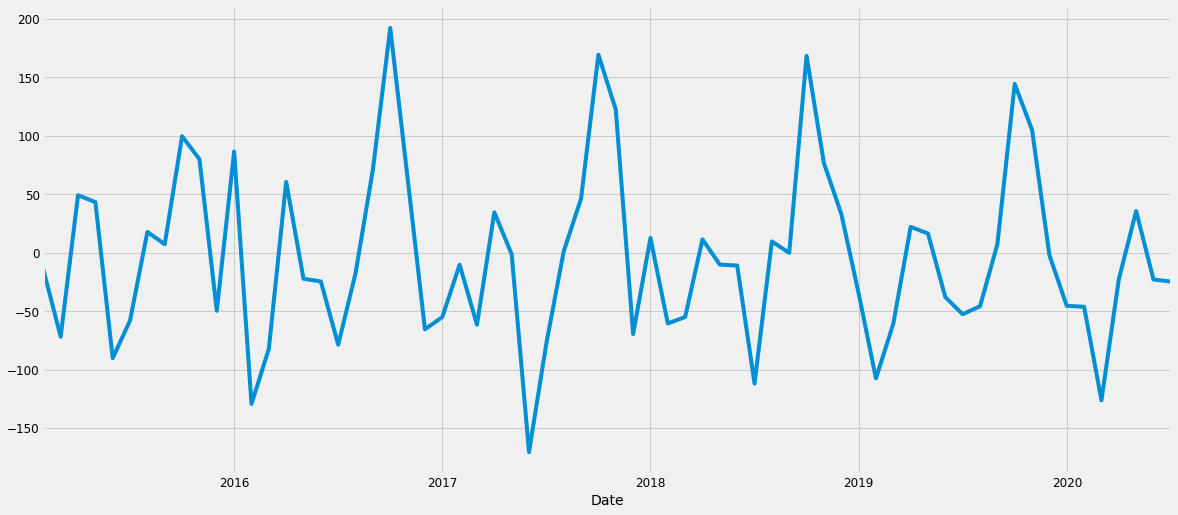

In [18]:
ts_t_adj = ts_month_avg - ts_month_avg.shift(1)
ts_t_adj = ts_t_adj.dropna()
ts_t_adj.plot()

In [19]:
#apply adf test on the series
print(adf_test(ts_t_adj))

Results of Dickey-Fuller Test:
Test Statistic                -6.795995e+00
p-value                        2.300252e-09
#Lags Used                     1.000000e+01
Number of Observations Used    5.500000e+01
Critical Value (1%)           -3.555273e+00
Critical Value (5%)           -2.915731e+00
Critical Value (10%)          -2.595670e+00
dtype: float64
None


<AxesSubplot:xlabel='Date'>

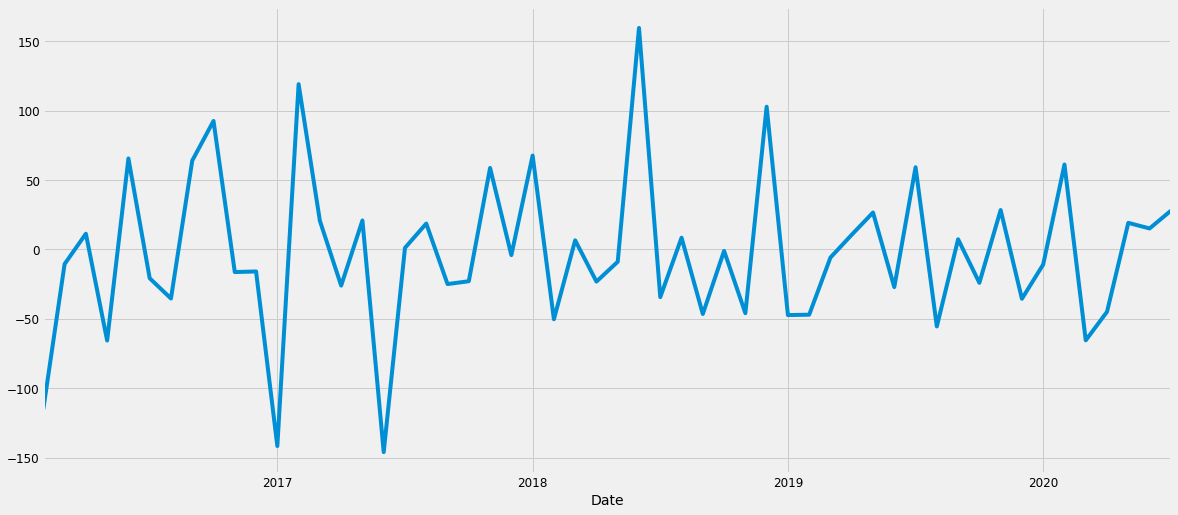

In [20]:
ts_s_adj = ts_t_adj - ts_t_adj.shift(12)
ts_s_adj = ts_s_adj.dropna()
ts_s_adj.plot()

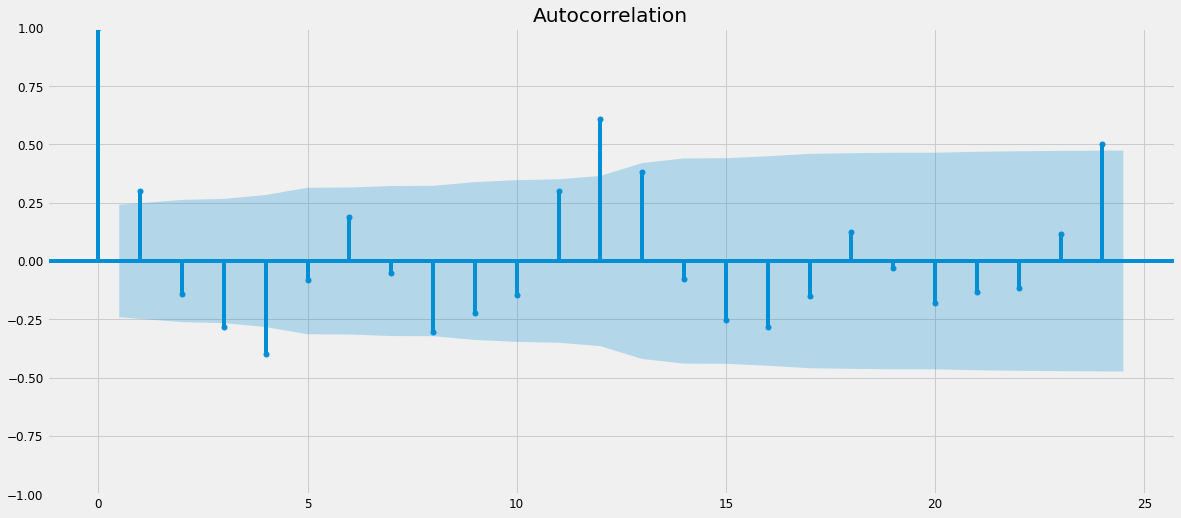

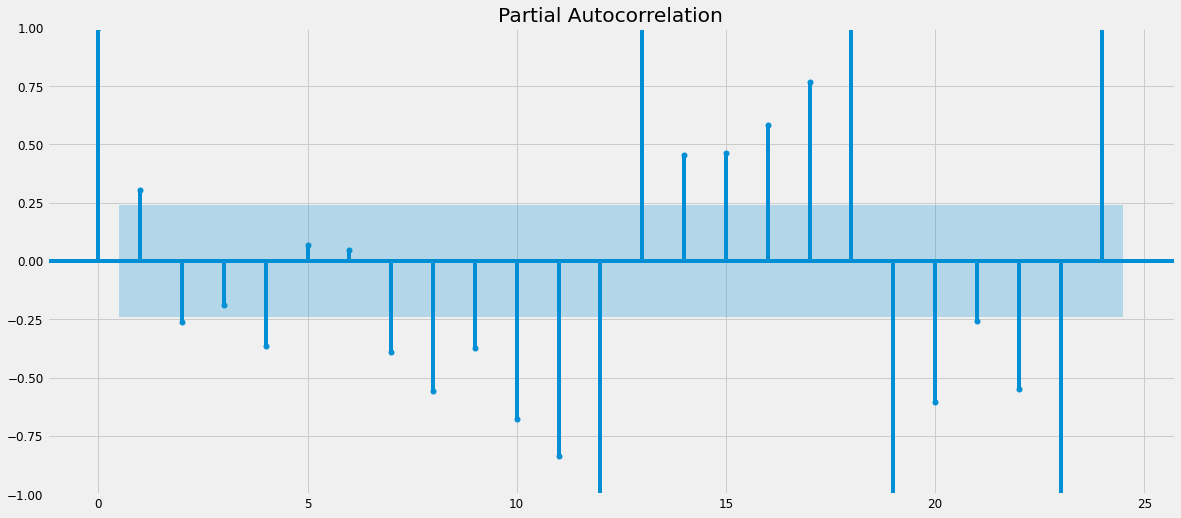

In [21]:
# Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_t_adj, lags=24)
matplotlib.pyplot.show()
plot_pacf(ts_t_adj, lags = 24)
matplotlib.pyplot.show()

In [59]:
p = range(0, 3)
d = range(1,2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = []
for x in list(itertools.product(p, d, q)):
    seasonal_pdq.append((x[0], x[1], x[2], 12) )

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 3, 12)


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12)]

In [60]:
from operator import itemgetter
params_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_s_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            params_list.append([param, param_seasonal, results.aic])
        except:
            continue

params_list = sorted(params_list, key=itemgetter(2))[0]
print(f'Beste ARIMA params: {params_list[0]}x{params_list[1]}12 - AIC:{params_list[2]}')

Optimization terminated successfully.
         Current function value: 4.960489
         Iterations: 2
         Function evaluations: 43
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:537.7328344169001
Optimization terminated successfully.
         Current function value: 4.732679
         Iterations: 2
         Function evaluations: 129
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:515.1293857551271
Optimization terminated successfully.
         Current function value: 4.603874
         Iterations: 6
         Function evaluations: 233
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:503.218397473712
Optimization terminated successfully.
         Current function value: 4.545446
         Iterations: 6
         Function evaluations: 320
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:498.9081401051102
Optimization terminated successfully.
         Current function value: 4.709652
         Iterations: 3
         Function evaluations: 79
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:512.642411423605
Optimization terminated successfully.
 

In [61]:
#ARIMA(0, 1, 1)x(2, 1, 0, 12)
mod = sm.tsa.statespace.SARIMAX(ts_s_adj,
                                order=(0, 1, 1),
                                seasonal_order=(2, 1, 0, 12))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 4.333914
         Iterations: 5
         Function evaluations: 313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.416     -2.403      0.016      -1.816      -0.184
ar.S.L12      -1.2064      0.174     -6.945      0.000      -1.547      -0.866
ar.S.L24      -0.6530      0.167     -3.920      0.000      -0.980      -0.327
sigma2      2749.4809      0.000   1.82e+07      0.000    2749.481    2749.481


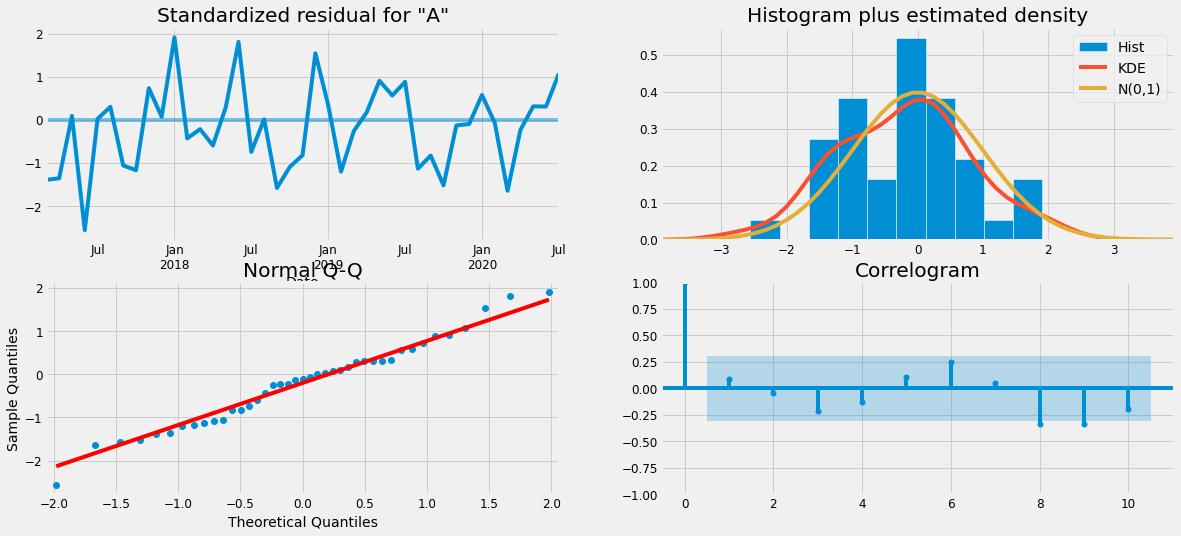

In [62]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

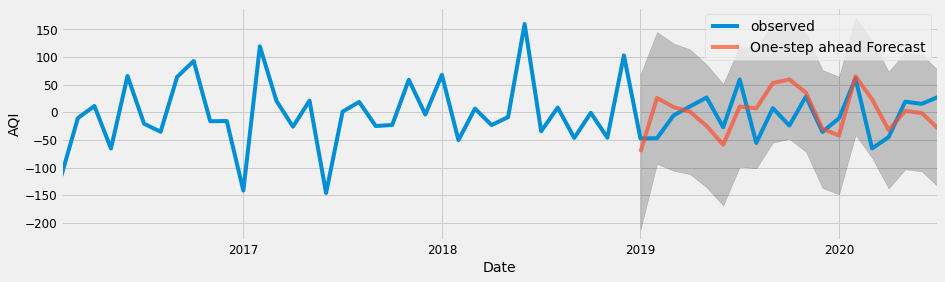

In [63]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_s_adj.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.legend()
plt.show()

In [64]:
y_forecasted = pred.predicted_mean
y_truth = ts_s_adj['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2011.58
The Root Mean Squared Error is 44.85
